DISTANCE HISTOGRAM CALCULATIONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct
import sys
import io
import time

datadir = 'C:\\richard\\github\\PyQUANT3\\inputs\\model-runs\\'
#dis_crowfly_vertex_roads_KM.bin
#dis_crowfly_vertex_gbrail_KM.bin
#dis_crowfly_vertex_bus_KM.bin
#dis_bus_min.bin
#dis_gbrail_min.bin
#dis_roads_min.bin

def loadQUANTMatrixFAST(filename):
    start_time = time.process_time()
    with open(filename,'rb') as f:
        (m,) = struct.unpack('i', f.read(4))
        (n,) = struct.unpack('i', f.read(4))
        print("loadQUANTMatrixFAST::m=",m,"n=",n)
        matrix = np.arange(m*n,dtype=np.float64).reshape(m, n) #and hopefully m===n, but I'm not relying on it
        for i in range(0,m):
            data = struct.unpack('{0}f'.format(n), f.read(4*n)) #read a row back from the stream - data=list of floats
            #for j in range(0,n):
            #    matrix[i,j] = data[j]
            matrix[i,:] = data
        end_time = time.process_time()
        print("loadQUANTMatrixFAST:: ",str(end_time-start_time),"secs")
        return matrix


#START

disRoadsMin = loadQUANTMatrixFAST(datadir+'dis_roads_min.bin')
disBusMin = loadQUANTMatrixFAST(datadir+'dis_bus_min.bin')
disGBRailMin = loadQUANTMatrixFAST(datadir+'dis_gbrail_min.bin')

disRoadsVertexKM = loadQUANTMatrixFAST(datadir+'dis_crowfly_vertex_roads_KM.bin')
disBusVertexKM = loadQUANTMatrixFAST(datadir+'dis_crowfly_vertex_bus_KM.bin')
disGBRailVertexKM = loadQUANTMatrixFAST(datadir+'dis_crowfly_vertex_gbrail_KM.bin')

#flatten matrix into a list of cost values
df_road = pd.DataFrame(disRoadsMin.flatten())
#print(df_road.head())
df_bus = pd.DataFrame(disBusMin.flatten())
df_rail = pd.DataFrame(disGBRailMin.flatten())

#now speeds
speed_road = disRoadsVertexKM / (disRoadsMin/60.0) #which is KM/hour
speed_bus = disBusVertexKM / (disBusMin/60.0)
speed_rail = disGBRailVertexKM / (disGBRailMin/60.0)

#flatten and make into a list
df_road_speed = pd.DataFrame(speed_road.flatten())
invalid=np.sum(df_road_speed>112) #70MPH = 112 KPH
print('Road Speed: invalid values > 100 = ',invalid)
df_bus_speed = pd.DataFrame(speed_bus.flatten())
invalid=np.sum(df_bus_speed>112)
print('Bus Speed: invalid values > 100 = ',invalid)
df_rail_speed = pd.DataFrame(speed_rail.flatten())
#NOTE: no invalid values for rail (300KPH? - it just seems to work OK anyway)


loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.390625 secs
loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.46875 secs
loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.453125 secs
loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.53125 secs
loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.53125 secs
loadQUANTMatrixFAST::m= 8436 n= 8436
loadQUANTMatrixFAST::  3.453125 secs


c:\richard\github\PyQUANT-Jupyter\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Road Speed: invalid values > 100 =  0    316
dtype: int64
Bus Speed: invalid values > 100 =  0    73945
dtype: int64


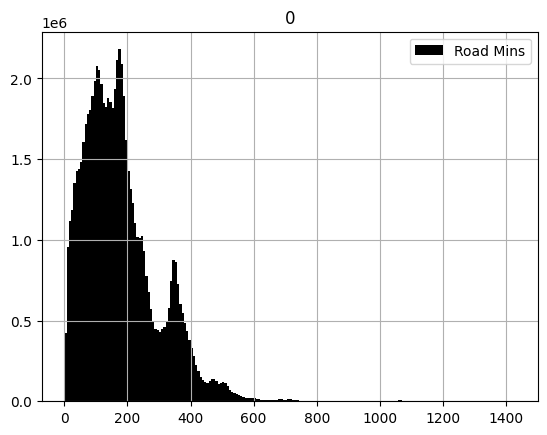

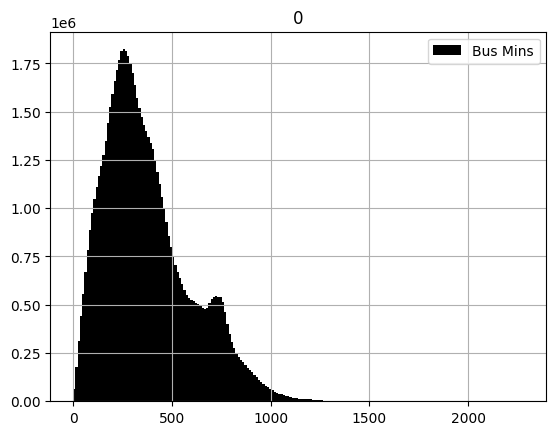

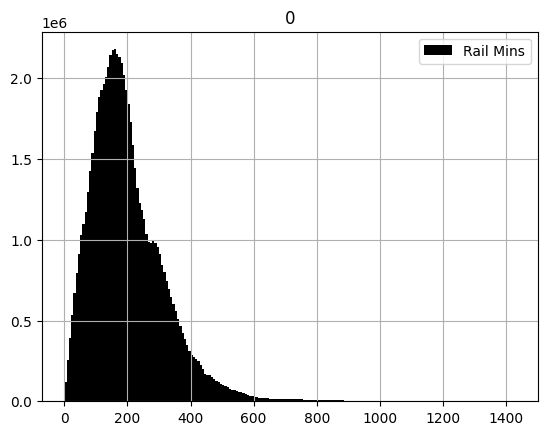

In [2]:
#TIME HISTOGRAMS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#histogram plot
df_road.hist(bins=200, color='Black')
plt.legend(['Road Mins'])
plt.show()

#histogram plot
df_bus.hist(bins=200, color='Black')
plt.legend(['Bus Mins'])
plt.show()

#histogram plot
df_rail.hist(bins=200, color='Black')
plt.legend(['Rail Mins'])
plt.show()

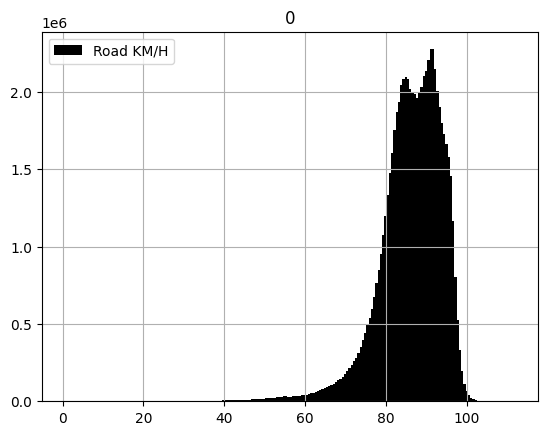

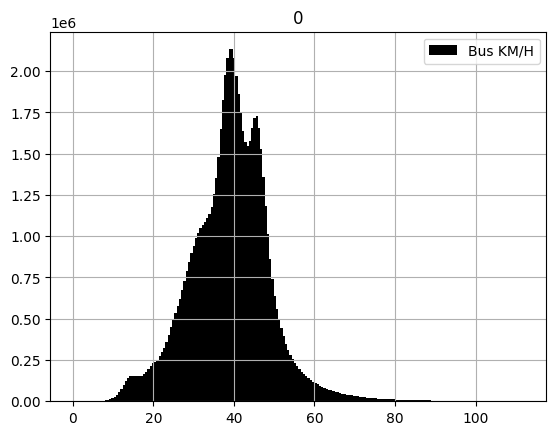

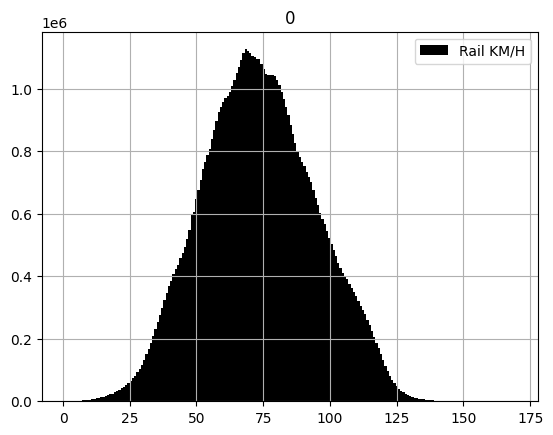

In [3]:
#SPEED HISTOGRAMS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#histogram plot
df_road_speed[df_road_speed<=112].hist(bins=200, color='Black')
plt.legend(['Road KM/H'])
plt.show()

#histogram plot
df_bus_speed[df_bus_speed<=112].hist(bins=200, color='Black')
plt.legend(['Bus KM/H'])
plt.show()

#histogram plot
df_rail_speed.hist(bins=200, color='Black')
plt.legend(['Rail KM/H'])
plt.show()